<a href="https://colab.research.google.com/github/tauseeqhussain/ImgClassficiation_CNN/blob/main/Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Conv2D, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam



4422102/4422102 [==============================] - 0s 0us/step


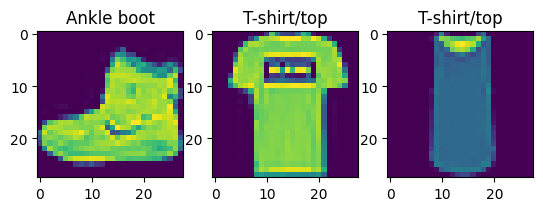

In [2]:
# ============================= step 1: prepare datasets =============================
tf.config.set_visible_devices([], 'GPU')  # CPU mode, comment this line to switch GPU mode

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()  # load data
# x_train: training data, y_train: training label, x_test: validation data, y_test: validation label

category = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
            5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}  # set label-category mapping

_, display = plt.subplots(1, 3)  # display three training examples
for i in range(3):
    display[i].imshow(x_train[i])
    display[i].title.set_text(category[y_train[i]])
plt.show()

x_train_expand = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float16')  # preprocessing data
x_test_expand = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float16')

In [3]:
# ============================= step 2: construct the model here =============================
model = tf.keras.Sequential()  # construct your model according to the given Table

model = Sequential([
    Conv2D(16, 7, padding='same', activation='relu', input_shape=(28, 28,1)),
    AveragePooling2D(pool_size=(2,2)),
    Conv2D(32, 5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, 3, padding='same', activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10)
])
#finding the loss
#model.compile(optimizer='adam',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              #metrics=['accuracy'])



In [4]:
#checking my model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        800       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)             

In [5]:
# ============================= step 3: compile and train =============================
model.compile(optimizer=Adam(learning_rate=0.01),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])  # set up your training hyperparameters, use Adam for optimizer and 0.01 as learning rate
# use SparseCategoricalCrossentropy to compute loss
# make sure metrics=['accuracy] is used in the model.compile()

model_history = model.fit(x=x_train_expand, y=y_train, validation_split=0.3, epochs=5)  # training


Epoch 1/5
1313/1313 [==============================] - 62s 46ms/step - loss: 1.2492 - accuracy: 0.7736 - val_loss: 0.5139 - val_accuracy: 0.8099
Epoch 2/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.5040 - accuracy: 0.8133 - val_loss: 0.5567 - val_accuracy: 0.7917
Epoch 3/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.5156 - accuracy: 0.8118 - val_loss: 0.5179 - val_accuracy: 0.8085
Epoch 4/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.5076 - accuracy: 0.8109 - val_loss: 0.5165 - val_accuracy: 0.8074
Epoch 5/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.5357 - accuracy: 0.8005 - val_loss: 0.5143 - val_accuracy: 0.8063


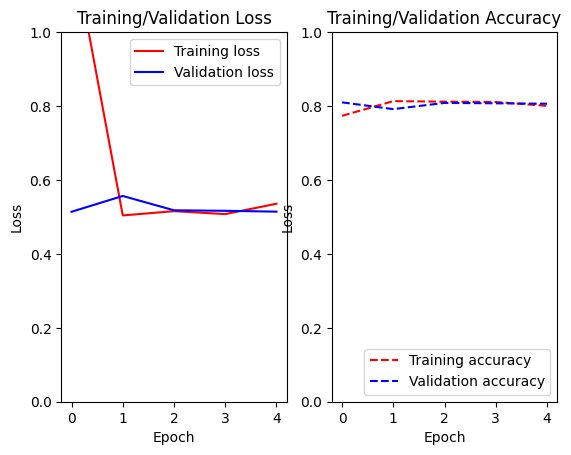

313/313 [==============================] - 4s 14ms/step - loss: 0.5252 - accuracy: 0.8009
validation accuracy: 0.80


In [6]:
# ============================= step 4: plot loss/accuracy history =============================
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
acc = model_history.history['accuracy']   # make sure metrics=['accuracy] is used in the model.compile()
val_acc = model_history.history['val_accuracy']   # make sure metrics=['accuracy] is used in the model.compile()
epochs = range(5)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training/Validation Loss')
plt.ylim([0, 1])  # adjust y axis if your training/validation loss is above 1
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training/Validation Accuracy')
plt.ylim([0, 1])  # adjust y axis if your training/validation loss is above 1
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x=x_test_expand, y=y_test)
print(f'validation accuracy: {test_acc:.2f}')


313/313 [==============================] - 4s 11ms/step


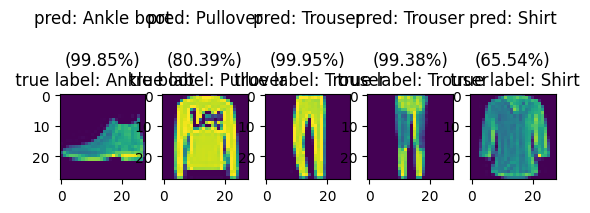

In [7]:
# ============================= step 5: prediction =============================
predictions = model.predict([x_test_expand])  # Make prediction
score = tf.nn.softmax(predictions)
_, display = plt.subplots(1, 5)
for i in range(5):
    display[i].imshow(x_test[i])
    pred_score = 100*np.max(score[i])
    title = 'pred: ' + category[int(np.argmax(predictions[i]))] + \
            '\n\n(' + str(round(pred_score, 2)) + '%)' + \
            '\n true label: ' + category[y_test[i]]
    display[i].title.set_text(title)

plt.show()







